# <font color=lightblue>Spam Detection Using Logistic Regression</font>

*In this project I will build a Machine learning model which will predict whether a mail is spam or ham(not-spam)*

In [1]:
#importing  libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#loading the data
mail_data=pd.read_csv('/content/mail_data.csv')
mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
mail_data.shape

(5572, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


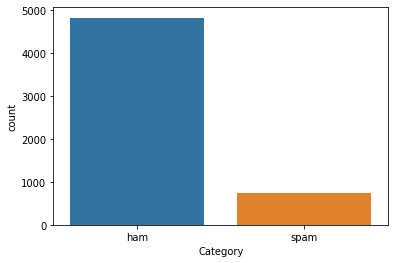

In [5]:
sns.countplot(mail_data['Category'])

Replacing  
*   spam = 0
*   ham = 1



In [6]:
mail_data.replace({"Category":{"spam":0,"ham":1}},inplace=True)
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


*Separating the text into X(message)  and  Y(category) variables.*

In [7]:
X = mail_data['Message']
Y = mail_data['Category']

*Splitting the dataset into train and test.*

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.22,random_state=4)

**Feature Extraction**

In [9]:
feature_extractor= TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
X_train=feature_extractor.fit_transform(X_train)
X_test=feature_extractor.transform(X_test)

In [10]:
print(X_train)

  (0, 5419)	0.26793973296557655
  (0, 4573)	0.26793973296557655
  (0, 4426)	0.22375567494754553
  (0, 5030)	0.2855599629856771
  (0, 2268)	0.26793973296557655
  (0, 2912)	0.24074297656906501
  (0, 3593)	0.26793973296557655
  (0, 4975)	0.20181811379470097
  (0, 4167)	0.2349806747959833
  (0, 7124)	0.2349806747959833
  (0, 6921)	0.26793973296557655
  (0, 196)	0.2855599629856771
  (0, 6922)	0.26793973296557655
  (0, 448)	0.26165080065899365
  (0, 4316)	0.16601415135226014
  (0, 1867)	0.22572727612138435
  (1, 7262)	0.3635609564140615
  (1, 4910)	0.3533999730228349
  (1, 4019)	0.22423665421934405
  (1, 4395)	0.40462249975222214
  (1, 7090)	0.3284633704256102
  (1, 6433)	0.24013764451448655
  (1, 1806)	0.3344273277753194
  (1, 4937)	0.26750007112538027
  (1, 2069)	0.3449411705265872
  :	:
  (4343, 1540)	0.5037912204284865
  (4344, 1241)	0.36333658035448946
  (4344, 1778)	0.36333658035448946
  (4344, 6309)	0.36333658035448946
  (4344, 6043)	0.34637219639254835
  (4344, 3223)	0.31737139045878

## Model Building

In [11]:
model = LogisticRegression()

In [12]:
model.fit(X_train,Y_train)

LogisticRegression()

*Model validation*

In [13]:
#on train data
pred_on_train_data=model.predict(X_train)
accuracy_on_train_data=accuracy_score(Y_train,pred_on_train_data)
print("The accuracy on Training data is {}".format(accuracy_on_train_data))

The accuracy on Training data is 0.9673262770363553


In [14]:
#on test data
pred_on_test_data=model.predict(X_test)
print("The accuracy on Test data is {}".format(accuracy_score(Y_test,pred_on_test_data)))

The accuracy on Test data is 0.9502446982055465


***The model is performing good it does not overfit or underfit.***

###  Building a Predictive System

In [15]:
mail = ["Hi SurajkumarI reviewed your assignment.In SLR, transformations like Log, sqrt , sq etc are not applied on models. Please make the changes and resubmit the assignment.Create GITHUB  repositories and upload your codes there."]
final_data=feature_extractor.transform(mail)

predictions=model.predict(final_data)
if (predictions[0]==0):
  print("The mail is spam")
else:
  print("The mail is Ham(not spam)")

The mail is Ham(not spam)


In [ ]:
#Taking input from user
mail = [input("Paste the text of the mail here")]
final_data=feature_extractor.transform(mail)

predictions=model.predict(final_data)
if (predictions[0]==0):
  print("The mail is spam")
else:
  print("The mail is Ham(not spam)")